In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df_ldap = pd.read_csv("LDAP/LDAP_level2.csv")

In [3]:
df_dns = pd.read_csv("DNS/DNS_level2.csv")

In [4]:
df_netbios = pd.read_csv("Netbios/Netbios_level2.csv")

In [5]:
df_snmp = pd.read_csv("SNMP/SNMP_level2.csv")

In [6]:
df_port = pd.read_csv("Portmap/Portmap_level2.csv")

In [7]:
df_tftp = pd.read_csv("TFTP/TFTP_level2.csv")

In [8]:
df_ssdp = pd.read_csv("SSDP/SSDP_level2.csv")

In [9]:
df_ntp =pd.read_csv("NTP/NTP_level2.csv")

In [10]:
df_mssql = pd.read_csv("MSSQL/MSSQL_level2.csv")

In [11]:
df_udp = pd.read_csv("UDP/UDP_level2.csv")

In [12]:
df_udplag = pd.read_csv("UDPLag/UDPLag_level2.csv")

In [13]:
df_syn = pd.read_csv("Syn/Syn_level2.csv")

In [27]:
df_final = pd.concat([df_ldap,
                     df_dns,
                     df_netbios,
                     df_snmp,
                     df_port,
                     df_tftp,
                     df_ssdp,
                     df_ntp,
                     df_mssql,
                     df_udp,
                     df_udplag,
                     df_syn])

In [28]:
# df_final = pd.read_csv('df_level2.csv')

In [29]:
df_final.shape

(179000, 68)

In [30]:
df_final = df_final.reset_index()
df_final = df_final.drop('index', axis = 1)
df_final.shape

(179000, 68)

In [31]:
df_final_counts = df_final.groupby(' Label')[' Label'].count().reset_index(name="count")

In [32]:
cols = df_final.columns

In [33]:
# df_final = df_final.drop('Unnamed: 0', axis = 1)

In [34]:
df_final_counts

,Label,count
0,DrDoS_DNS,6000
1,DrDoS_MSSQL,15000
2,DrDoS_NTP,15000
3,DrDoS_SNMP,6000
4,DrDoS_SSDP,15000
5,LDAP,6000
6,NetBIOS,6000
7,Portmap,6000
8,Syn,45000
9,TFTP,15000


In [35]:
data_classes = list(df_final[' Label'].unique())

In [36]:
data_classes

['LDAP',
 'DrDoS_DNS',
 'NetBIOS',
 'DrDoS_SNMP',
 'Portmap',
 'TFTP',
 'DrDoS_SSDP',
 'DrDoS_NTP',
 'DrDoS_MSSQL',
 'UDP',
 'UDP-lag',
 'Syn']

In [37]:
df_final[' Label'].unique()

array(['LDAP', 'DrDoS_DNS', 'NetBIOS', 'DrDoS_SNMP', 'Portmap', 'TFTP',
       'DrDoS_SSDP', 'DrDoS_NTP', 'DrDoS_MSSQL', 'UDP', 'UDP-lag', 'Syn'],
      dtype=object)

In [38]:
for i in range(len(df_final)):
    if df_final[' Label'][i] == 'UDP' or df_final[' Label'][i] == 'UDP-lag' or df_final[' Label'][i] == 'Syn':
        df_final[' Label'][i] = 1
    else:
        df_final[' Label'][i] = 0

/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df_final[' Label'].unique()

array([0, 1], dtype=object)

In [40]:
df_final.shape

(179000, 68)

In [41]:
df_final.to_csv('df_level2.csv', index = False)

In [42]:
df_import = pd.read_csv('df_level2.csv')

In [43]:
df_import.shape

(179000, 68)

In [44]:
df_import[' Label'].unique()

array([0, 1])

In [31]:
# columns_remove = [' Total Length of Bwd Packets',
# 'Bwd Packet Length Max',
#  ' Bwd Packet Length Min',
#  ' Bwd Packet Length Std',
#  ' Bwd IAT Mean',
# 'Fwd PSH Flags',
#  ' URG Flag Count',
#  ' CWE Flag Count', ' Avg Bwd Segment Size',
#  ' Subflow Bwd Bytes',
# 'Active Mean',
#  ' Active Max',
#  ' Active Min',
#  'Idle Mean',
#  ' Idle Std',
#  ' Idle Max',
#  ' Idle Min',' Label' ]

In [60]:
data_classes = list(df_final[' Label'].unique())

In [61]:
df_final[' Label'] = df_final[' Label'].apply(data_classes.index)

In [62]:
X = df_final.drop(' Label', axis = 1)

In [63]:
X.shape

(179000, 67)

In [64]:
y = df_final[' Label'].values

In [65]:
y

array([ 0,  0,  0, ..., 11, 11, 11])

In [66]:
for i in range(len(y)):
    if y[i] == 9 or y[i] == 10 or y[i] == 11:
        y[i] = 1
    else:
        y[i] = 0

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

anova_features = SelectKBest(f_classif)

In [68]:
k_best_features_anova = anova_features.fit_transform(X, y)

In [69]:
for i in range(len(anova_features.scores_)):
    if anova_features.scores_[i] > 100000:
        print(X.columns[i], ":", anova_features.scores_[i])

 Protocol : 226900.80005186
 Fwd Packet Length Max : 108530.84965551314
 Fwd Packet Length Min : 100319.04084001893
 Fwd Packet Length Mean : 108546.21175002427
 Min Packet Length : 100544.35972684255
 Max Packet Length : 108517.6679384634
 Packet Length Mean : 108949.48812955793
 ACK Flag Count : 227242.51460420137
 Avg Fwd Segment Size : 108546.21175002427
Init_Win_bytes_forward : 199448.62083675223


In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize = (20,20))
# importances = mutual_info_classif(X, y)
# feat_importances = pd.Series(importances, df_final.columns[0:len(df_final.columns)-1])
# feat_importances.plot(kind = 'barh', color = 'teal')
# plt.show()

In [ ]:
# X = df_final[[#' Source Port',
#             ' min_seg_size_forward',
#             ' Fwd IAT Mean',
#             ' Fwd IAT Max',
#             ' Flow IAT Max',
#             ' Flow IAT Mean',
#             ' Fwd Packet Length Std',
#             ' Packet Length Std',
#             ' Fwd Header Length',
#            # ' Length of Fwd Packets',
#             ' Flow IAT Min',
#             ' Destination Port',
#             ' Packet Length Std',
#             'Fwd IAT Total',
#             ' Flow Duration',
#             ' Protocol',
#            'Total Length of Fwd Packets',
#             ' Fwd Packet Length Mean',
#             ' Fwd Packet Length Max',
#             ' Fwd Packet Length Min',
#             ' Fwd Packet Length Std',
#             'Fwd Packets/s',
#             ' Min Packet Length',
#             ' Max Packet Length',
#             ' Packet Length Mean',
#             ' ACK Flag Count',
#             #' Down/Up Ratio',
#             ' Average Packet Size',
#             ' Avg Fwd Segment Size',
#            ' Subflow Fwd Bytes',
#             'Init_Win_bytes_forward']]

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
scaler = StandardScaler()

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, shuffle = True)

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
classifier_lr.predict(X_test)

/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([1, 0, 0, ..., 1, 1, 0])

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48     22500
           1       0.49      0.52      0.50     22250

    accuracy                           0.49     44750
   macro avg       0.49      0.49      0.49     44750
weighted avg       0.49      0.49      0.49     44750



In [36]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 7)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
pred_knn = classifier_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     22500
           1       0.88      0.92      0.90     22250

    accuracy                           0.90     44750
   macro avg       0.90      0.90      0.90     44750
weighted avg       0.90      0.90      0.90     44750



<AxesSubplot:>

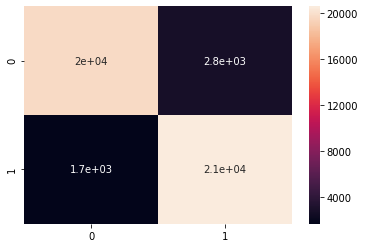

In [38]:
import seaborn as sns
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm, annot = True)

In [35]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random')
classifier_tree.fit(X_train, y_train)

pred_tree = classifier_tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22500
           1       0.90      0.90      0.90     22250

    accuracy                           0.90     44750
   macro avg       0.90      0.90      0.90     44750
weighted avg       0.90      0.90      0.90     44750



In [ ]:
from sklearn.svm import SVC

classifier_svc = SVC(C=1, gamma = 1, probability = True)

# classifier_svc.fit(X_train, y_train)

In [ ]:
pred_svc = classifier_svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_svc))

In [ ]:
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 100)

classifier_forest.fit(X_train, y_train)

pred_forest = classifier_forest.predict(X_test)
print(classification_report(y_test, pred_forest))

In [ ]:
from sklearn.ensemble import VotingClassifier

classifier_ensemble = VotingClassifier(estimators = [('knn', classifier_knn), ('dt', classifier_tree)], 
                                                     #('svc', classifier_svc)], 
                                       voting = 'soft')
classifier_ensemble.fit(X_train, y_train)

In [ ]:
pred_ensemble = classifier_ensemble.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_ensemble))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

classifier_boost = AdaBoostClassifier()

classifier_boost.fit(X_train, y_train)

In [ ]:
pred_boost = classifier_boost.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_boost))

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(batch_size = 128, max_iter = 1000)

classifier_mlp.fit(X_train, y_train)

In [ ]:
pred_mlp = classifier_mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_mlp))

In [ ]:
# df = pd.read_csv('df_level1')